In [6]:
import pandas as pd

In [7]:
df = pd.read_json('./aggregated.json')

In [8]:
df

,total,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
14,1934378127,23295915,22078380,23651763,21946476,24870688,26175248,25461609,24709076,24311630,...,26822866,20721278,22152362,21211061,22680030,30259782,31551681,29603348,23494667,15106465
16,1934378127,18037623,19188729,25387458,26331242,29964854,34152666,36402539,42243552,42598500,...,47226946,38380352,43269927,46156244,62287769,45309674,47531703,43572248,42295481,26698751
18,1934378127,0,0,0,873557,2542139,2931277,3341234,3699774,4758907,...,11444061,10164322,13111058,17721438,25144736,25137582,29819719,33996641,37891456,24736915
20,1934378127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1062138,3726636,5051717,5726349,3548404


In [ ]:
df.drop('total', axis=1, inplace=True)

In [ ]:
# Create a list to store the transformed data
data_list = []

# Iterate through the JSON data to transform it
for date, values in df.items():
    for hue, value in values.items():
        data_list.append({'Date': date, 'Hue': hue, 'Value': value})

# Create a DataFrame from the transformed data
df = pd.DataFrame(data_list)

In [ ]:
df = df[df.Value != 0]

In [3]:
import piplite
await piplite.install('seaborn')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
df

,Date,Hue,Value
0,2022-01,14,23295915
1,2022-01,16,18037623
4,2022-02,14,22078380
5,2022-02,16,19188729
8,2022-03,14,23651763
...,...,...,...
75,2023-07,20,5726349
76,2023-08,14,15106465
77,2023-08,16,26698751
78,2023-08,18,24736915


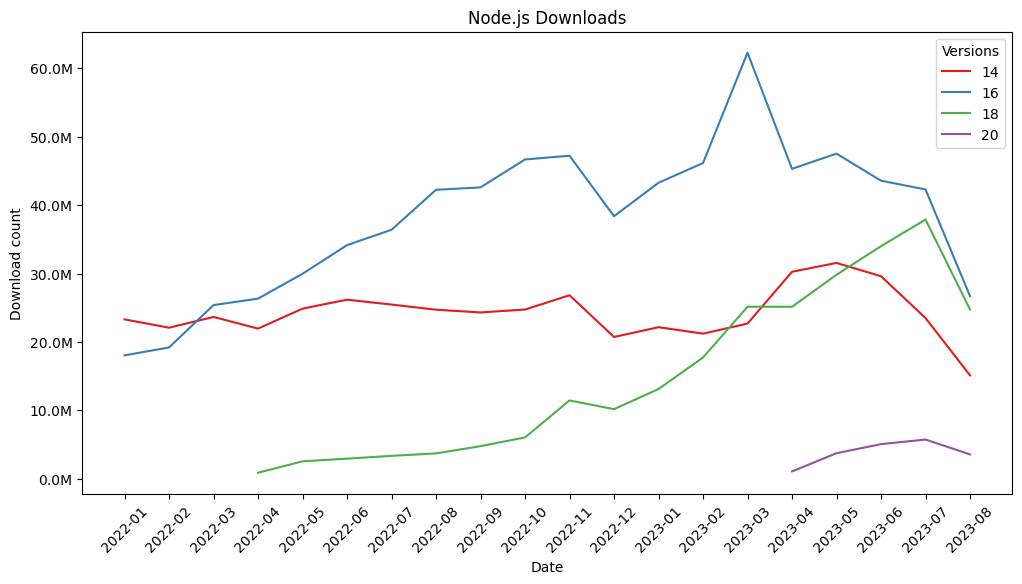

In [20]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plot = sns.lineplot(data=df, x='Date', y='Value', hue='Hue', palette='Set1', markers=True, dashes=False)
plt.title('Node.js Downloads')
plt.xlabel('Date')
plt.ylabel('Download count')
plt.legend(title='Versions')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
#plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()